In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
data = pd.read_csv('Health_AnimalBites.csv')

In [4]:
data.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [5]:
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [6]:
data.tail()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
8998,2017-09-05 00:00:00,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
8999,2017-09-07 00:00:00,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN
9002,2017-09-07 00:00:00,DOG,BOXER,NaN,BRN BLK,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


In [8]:
species = data.SpeciesIDDesc
species = species.dropna() #drop nan values in species feature
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


# Animal Name vs Number of Bites

In [9]:
animal_list = []
for  i in speciesOfAnimal:
    animal_list.append(len(species[species==i]))

In [10]:
animal_list

[7029, 1568, 237, 27, 11, 3, 5, 1, 4]

In [11]:
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

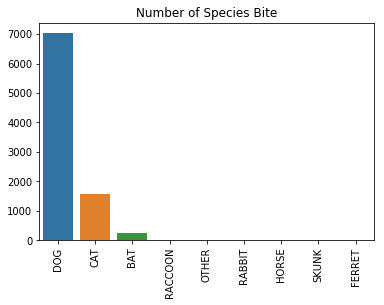

In [12]:
plt.show()

## Monthly distribution of dog, cat and bat bites are visualized.

In [15]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']
    numberOfAnimal = []
    for i in month_list:
        x = data.loc[(data['SpeciesIDDesc']==animal)&(data['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Blues")
    plt.title(animal + ' bite for 12 month')
    plt.show()

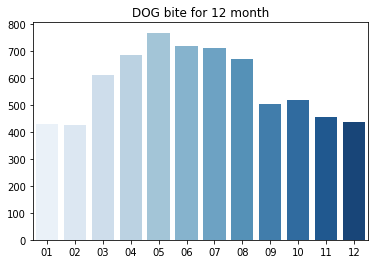

In [16]:
animal_month('DOG',data)

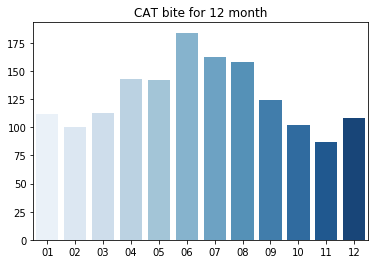

In [17]:
animal_month('CAT',data)

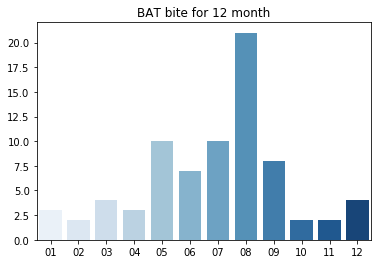

In [18]:
animal_month('BAT',data)

## Most 10 Aggresive species

In [19]:
count = data.BreedIDDesc.value_counts()
count

PIT BULL             1102
GERM SHEPHERD         327
LABRADOR RETRIV       253
BOXER                 181
CHICHAUHUA            165
SHIH TZU              119
BEAGLE                116
ROTTWEILER             86
AAUST. TERR.           78
DACHSHUND              67
GOLD RETRIEVER         60
POODLE                 50
BORDER COLLIE          47
YORKSHIRE TERRIER      46
CHOW CHOW              46
GREAT DANE             43
CANE CORSO             40
SCHNAUZER              39
POMERANIAN             38
OTHER                  35
BULL DOG               34
HUSKY                  34
DOBERMAN               32
COCKER SPAINEL         30
BOSTON TERRIER         29
AKITA                  28
ENGLISH BULLDOG        28
MALTASE                28
MASTIF                 27
MIN PIN                27
                     ... 
TOY POODLE              4
BICHON FRISE            4
ENGLISH SETTER          4
SAMOYED                 4
ENG. MASTIFF            3
BOX TERRIER             3
LAKELAND TER.           3
HEELER      

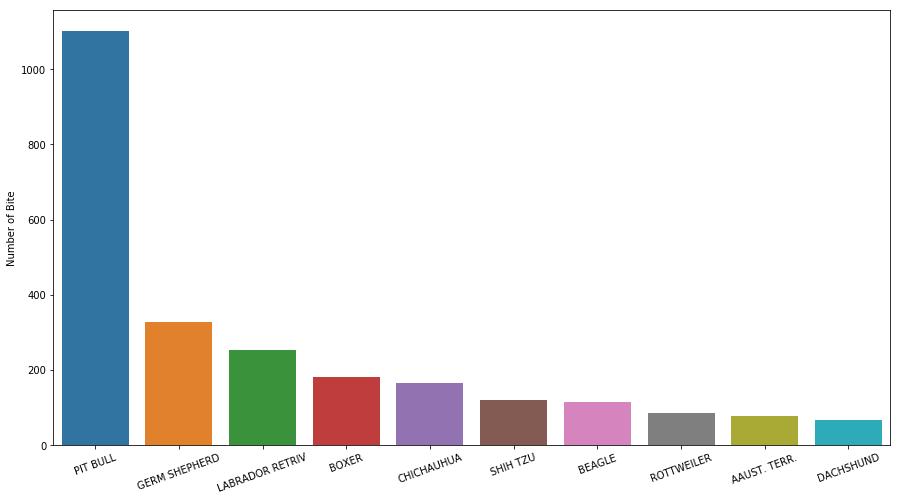

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


In [20]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")
plt.show()
print(count[0:10].index)

## Where dogs, cats and bats bite people are visualized. While changing bite_place method, you can observe where other animals bite.

In [22]:
def bite_place(animal,data):
    bitePlaces = data.WhereBittenIDDesc.unique()
    #print(bitePlaces)
    head = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='HEAD')]
    body = data.loc[(data['SpeciesIDDesc']==animal)&(data['WhereBittenIDDesc']=='BODY')]
    numberOfHead = len(head)
    numberOfBody = len(body)
    total = numberOfHead+numberOfBody
    fig1=plt.figure()
    ax1=fig1.add_subplot(111,aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0.3,0.1),0.4,0.5,alpha=numberOfBody/float(total),color='r')
    )
    circle = plt.Circle((0.5,0.7),0.1,color='r',alpha=numberOfHead/float(total))
    ax1.add_artist(circle)
    plt.text(0.45,0.7,round(numberOfHead/float(total),2))
    plt.text(0.45,0.4,round(numberOfBody/float(total),2))
    plt.title(str(animal)+' Bite Probability of Head and Body')
    plt.axis('off')
    plt.show()

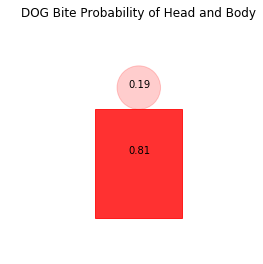

In [23]:
#Dog bites 19% head and 81% body
bite_place('DOG',data)

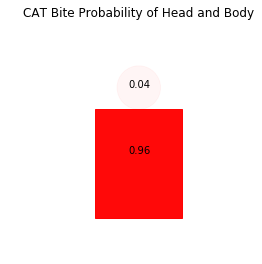

In [24]:
#Cat bites 4% head and 96% body
bite_place('CAT',data)

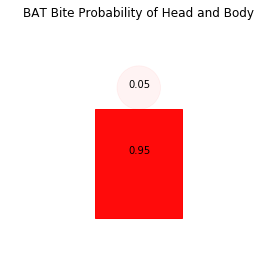

In [25]:
#Bat bites 5% head and 95% body
bite_place('BAT',data)

# Male or Female who is dangerous?

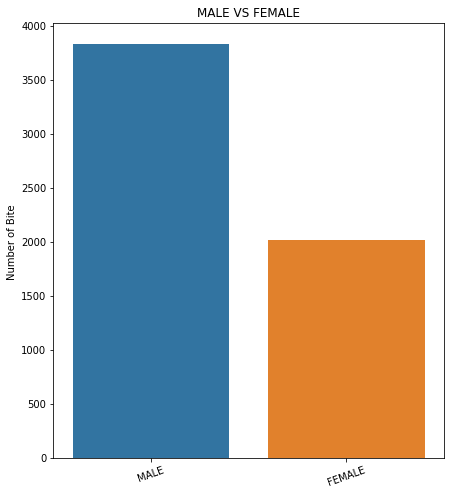

MALE      3832
FEMALE    2016
Name: GenderIDDesc, dtype: int64


In [26]:
gender = ['MALE','FEMALE']
count_gender = data.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Number of Bite ')
plt.xticks(rotation = 20)
plt.title('MALE VS FEMALE')
plt.show()
print(count_gender[0:2])

## Probabilty of having rabies

In [32]:
def rabid_prob(animal,data):
    labels = ['POSITIVE','NEGATIVE']
    colors = ['red','green']
    explode = [0.1,0]
    p = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='POSITIVE')]
    n = data.loc[(data['SpeciesIDDesc']==animal)&(data['ResultsIDDesc']=='NEGATIVE')]
    sizes = [len(p),len(n)]
    print(sizes)
    if len(p)==0:
        labels = ['','NEGATIVE']
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()

[1, 58]


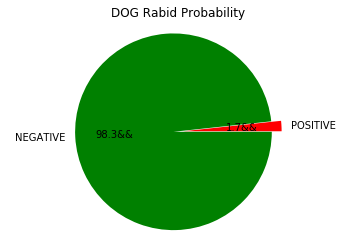

In [33]:
# Dog rabid probability is 1.7%
rabid_prob('DOG',data)